# Lets Grow More Data Science Intern

# Prediction using Decision Tree Algorithm

# Author- Swanand Patil

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('iris')

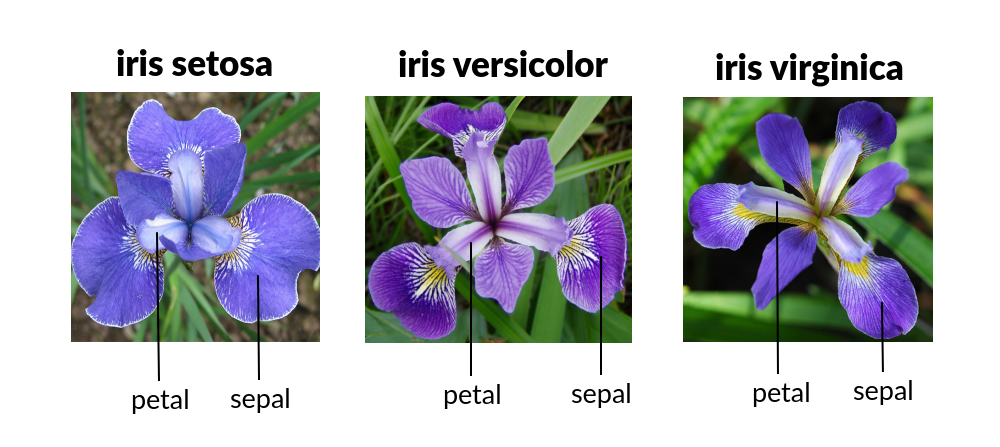

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.duplicated().value_counts()

False    149
True       1
dtype: int64

In [9]:
df['species'].replace({'setosa':1,'versicolor':2,'virginica':3},inplace=True)

In [10]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [11]:
df['species'].unique()

array([1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

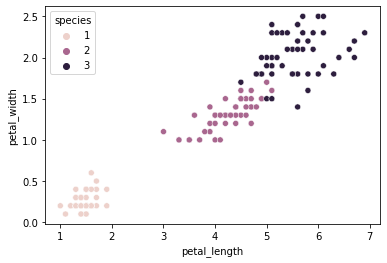

In [12]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

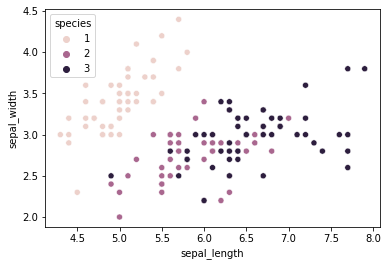

In [13]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

Text(68.09375, 0.5, 'Actual')

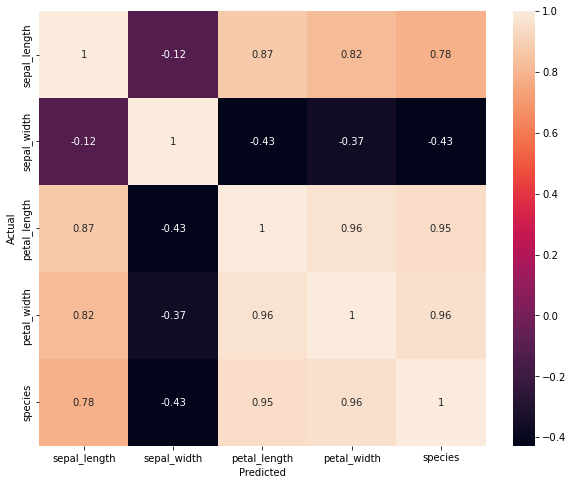

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0.5, 1.0, 'Count')

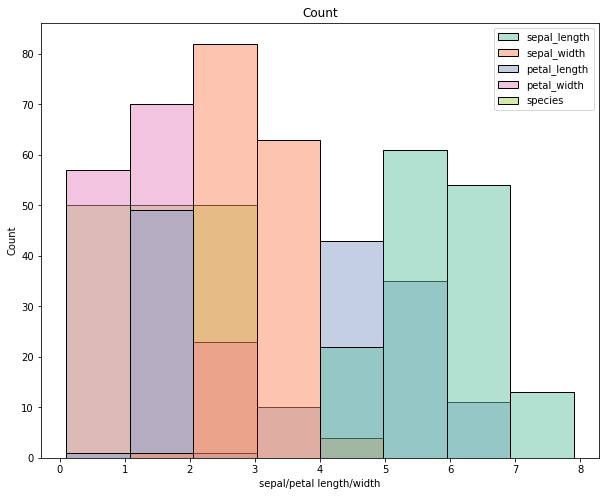

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,bins=8,palette='Set2')
plt.xlabel('sepal/petal length/width')
plt.title('Count')

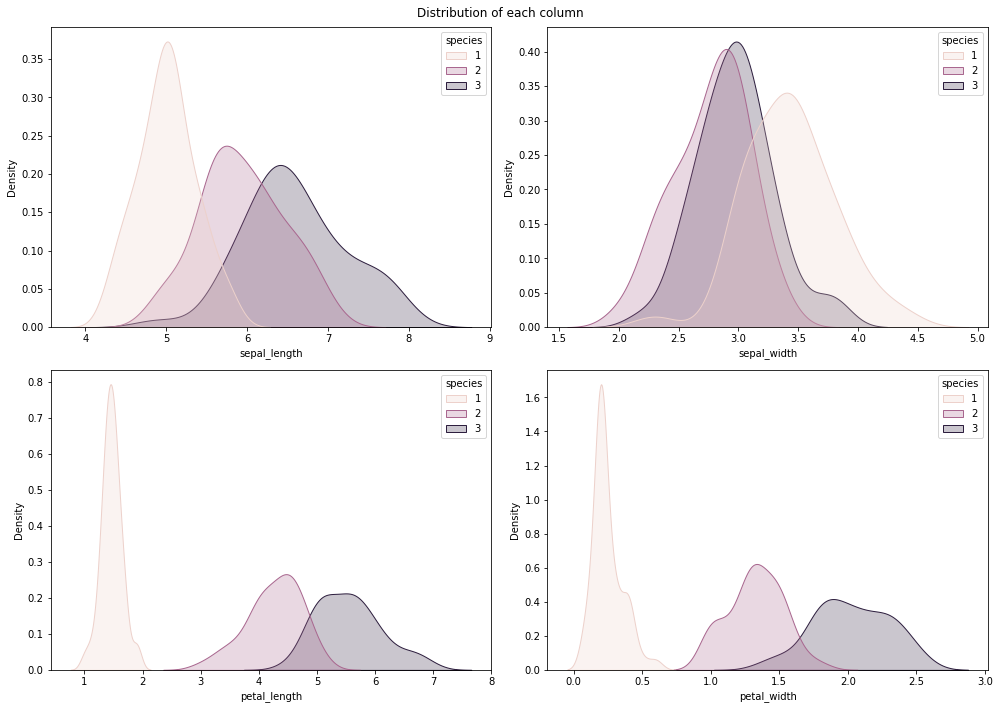

In [16]:
fig,axes=plt.subplots(figsize=(14,10),nrows=2,ncols=2)
plt.suptitle('Distribution of each column')
sns.kdeplot(data=df,x='sepal_length',hue='species',shade=True,ax=axes[0][0])
sns.kdeplot(data=df,x='sepal_width',hue='species',shade=True,ax=axes[0][1])
sns.kdeplot(data=df,x='petal_length',hue='species',shade=True,ax=axes[1][0])
sns.kdeplot(data=df,x='petal_width',hue='species',shade=True,ax=axes[1][1])
plt.tight_layout()
plt.show()





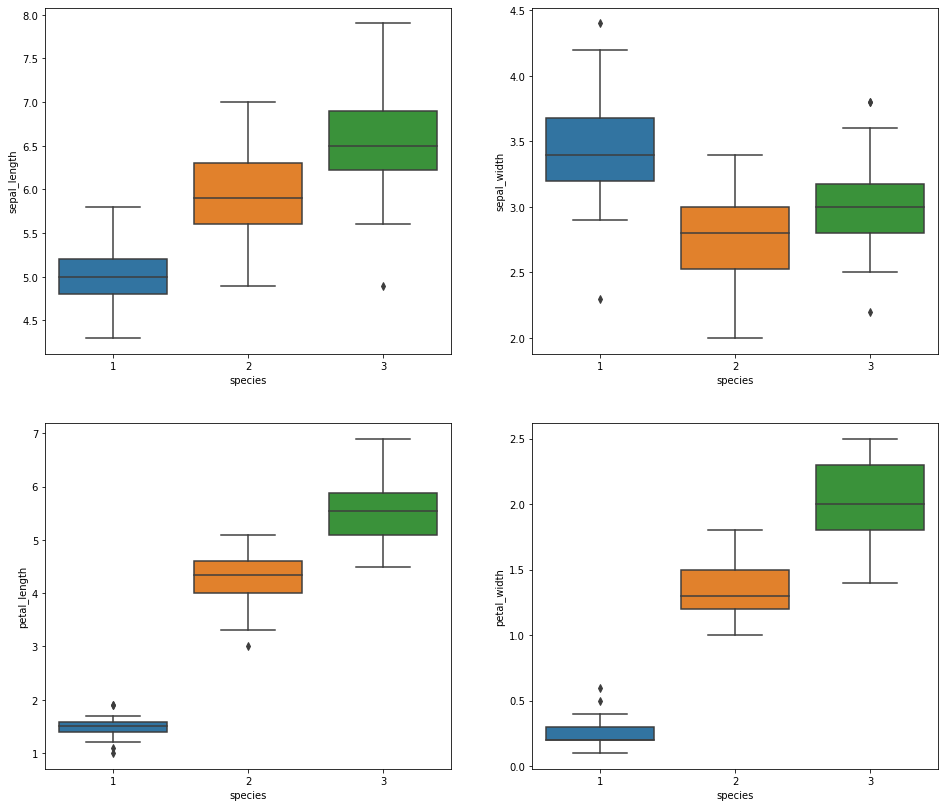

In [17]:
fig,axes=plt.subplots(figsize=(16,14),nrows=2,ncols=2)
sns.boxplot(x='species',y='sepal_length',data=df,ax=axes[0][0])
sns.boxplot(x='species',y='sepal_width',data=df,ax=axes[0][1])
sns.boxplot(x='species',y='petal_length',data=df,ax=axes[1][0])
sns.boxplot(x='species',y='petal_width',data=df,ax=axes[1][1])
plt.show()




# Logistic Regression

In [18]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Decision Tree Classifier

In [19]:
x=df.drop('species',axis=1)

In [20]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y=df['species']

In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=101)

In [24]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
74,6.4,2.9,4.3,1.3
88,5.6,3.0,4.1,1.3
96,5.7,2.9,4.2,1.3
42,4.4,3.2,1.3,0.2
134,6.1,2.6,5.6,1.4
...,...,...,...,...
63,6.1,2.9,4.7,1.4
70,5.9,3.2,4.8,1.8
81,5.5,2.4,3.7,1.0
11,4.8,3.4,1.6,0.2


In [25]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4


In [26]:
y_test

33     1
16     1
43     1
129    3
50     2
123    3
68     2
53     2
146    3
1      1
147    3
32     1
31     1
122    3
127    3
Name: species, dtype: int64

In [27]:
y_train

74     2
88     2
96     2
42     1
134    3
      ..
63     2
70     2
81     2
11     1
95     2
Name: species, Length: 135, dtype: int64

In [28]:
model=DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred

array([1, 1, 1, 2, 2, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3], dtype=int64)

# Accuracy

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[6, 0, 0],
       [0, 3, 0],
       [0, 1, 5]], dtype=int64)

<AxesSubplot:>

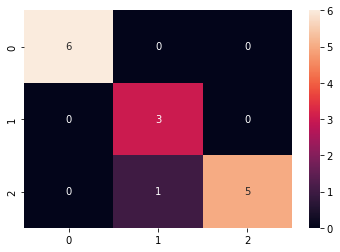

In [34]:
sns.heatmap(data=conf,annot=True)

In [35]:
model.score(x_test,y_test)*100

93.33333333333333

In [36]:

from sklearn import metrics
print('accuracy score:',metrics.accuracy_score(y_test,y_pred))

accuracy score: 0.9333333333333333


# Perform Evaluation on Test set

In [37]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



# modeling

In [38]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [39]:
iristree=DecisionTreeClassifier(criterion="entropy",max_depth=4)


In [40]:
iristree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
iristree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
predtree=iristree.predict(x_test)



In [43]:
print(predtree[0:5])
print(y_test[0:5])

[1 1 1 2 2]
33     1
16     1
43     1
129    3
50     2
Name: species, dtype: int64


# Visualization

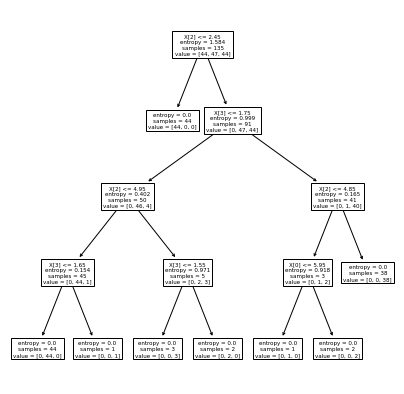

In [44]:
plt.figure(figsize=(7,7))
tree.plot_tree(iristree)
plt.show()

# Thank You!!